<a href="https://colab.research.google.com/github/Tiwari666/Classification_Model/blob/main/RF_DT_NaiveBaise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Information about dataset:**

The data set has the following features:

● BAD: 1 = client defaulted on loan , and 0 = loan repaid -----Target Variable.

● LOAN: Amount of the loan request

● MORTDUE: Amount due on existing mortgage

● VALUE: Value of current property

● REASON: DebtCon = debt consolidation; HomeImp = home improvement

● JOB: Occupational categories

● YOJ: Years at present job

● DEROG: Number of major derogatory reports

● DELINQ: Number of delinquent credit lines

Being late by more than one month on required monthly payments to credit card is considered as delinquent, but the information is typically not reported to credit reporting agencies until two or more payments are missed.

● CLAGE: Age of oldest credit line in months

● NINQ: Number of recent credit inquiries

● CLNO: Number of credit lines

● DEBTINC: Debt-to-income ratio

For all the money realted variable, the unit is $.

# **Objective:**

This is a classification problem about the home equity loan: wheather obligers default or not.

Predicting whether the obligor can pay home equity loan or not based on the several features. Possible classes: BAD=0 (the obligor can pay the home equity loan) or BAD = 1 (the obligor can not pay the home equity loan).

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import os
from IPython.display import Image

In [2]:
df1 = pd.read_csv('/content/hmeq_loan.csv')
df1

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [3]:
df=df1.copy()
df


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


# **EDA:**

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


In [6]:
# Summary statistics of numerical features
summary_statistics = df.describe()
summary_statistics.T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


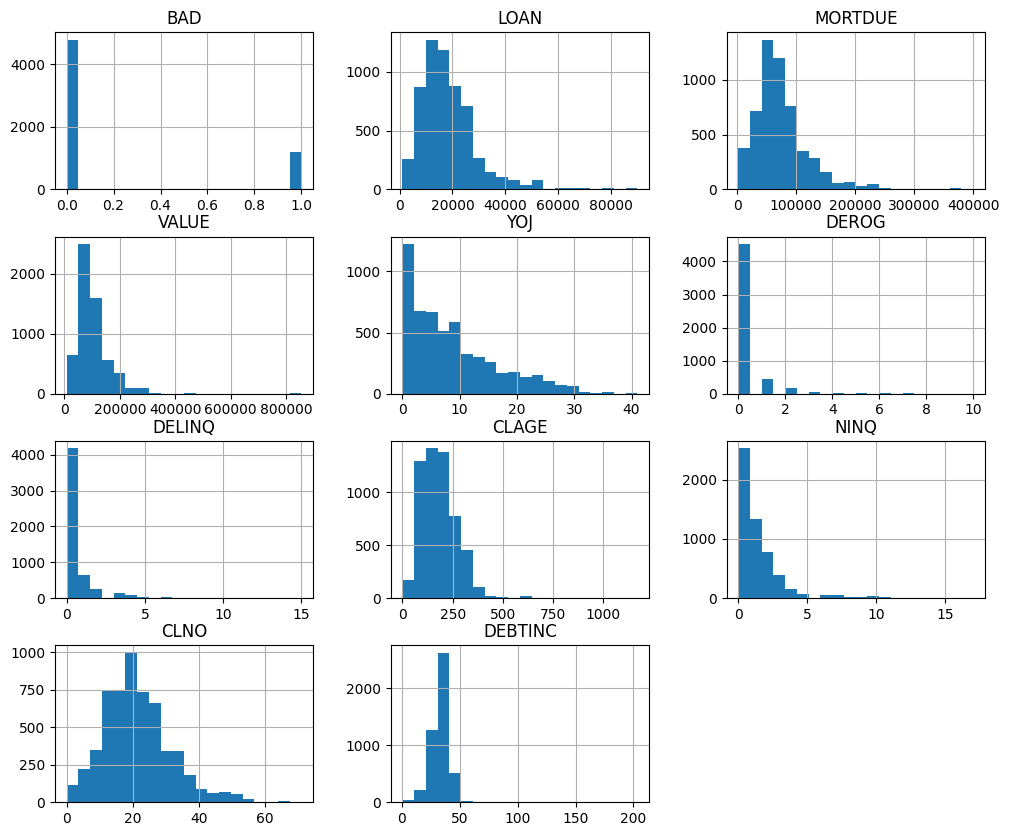

In [7]:
# Visualize distributions of numerical features with normal distribution curves
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Assuming df is your DataFrame containing the dataset
df.hist(figsize=(12, 10), bins=20)

# Add normal distribution curve to each histogram
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    mu, sigma = df[col].mean(), df[col].std()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, norm.pdf(x, mu, sigma), label='Normal Distribution')
    plt.legend(loc='upper right')

plt.show()


In [8]:
# Explore categorical features
for column in df.select_dtypes(include='object').columns:
    print(df[column].value_counts())

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64


# **Model Building: Decision Tree Model:**

# **Preprocessing Steps:**


# **Separate Features and Target Variable:**

In [9]:
X = df.drop('BAD', axis=1)
y = df['BAD']


# **Split Data into Training and Testing Sets:**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Preprocessing Pipelines for Numerical and Categorical Data:**

In [11]:
# Numerical features preprocessing
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical features preprocessing
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column transformer for preprocessing both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


# **Preprocess and Transform the Training Data:**

In [12]:
X_train_processed = preprocessor.fit_transform(X_train)

# **Transform the Testing Data Using the Fitted Preprocessor:**

In [13]:
X_test_processed = preprocessor.transform(X_test)

# **Model Building:**

In [14]:
# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=3, criterion='entropy')

In [15]:
# Fit the model to the preprocessed training data
dt_model.fit(X_train_processed, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [16]:
# Predict on the preprocessed testing data
y_pred_dt = dt_model.predict(X_test_processed)

In [19]:
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.8640939597315436


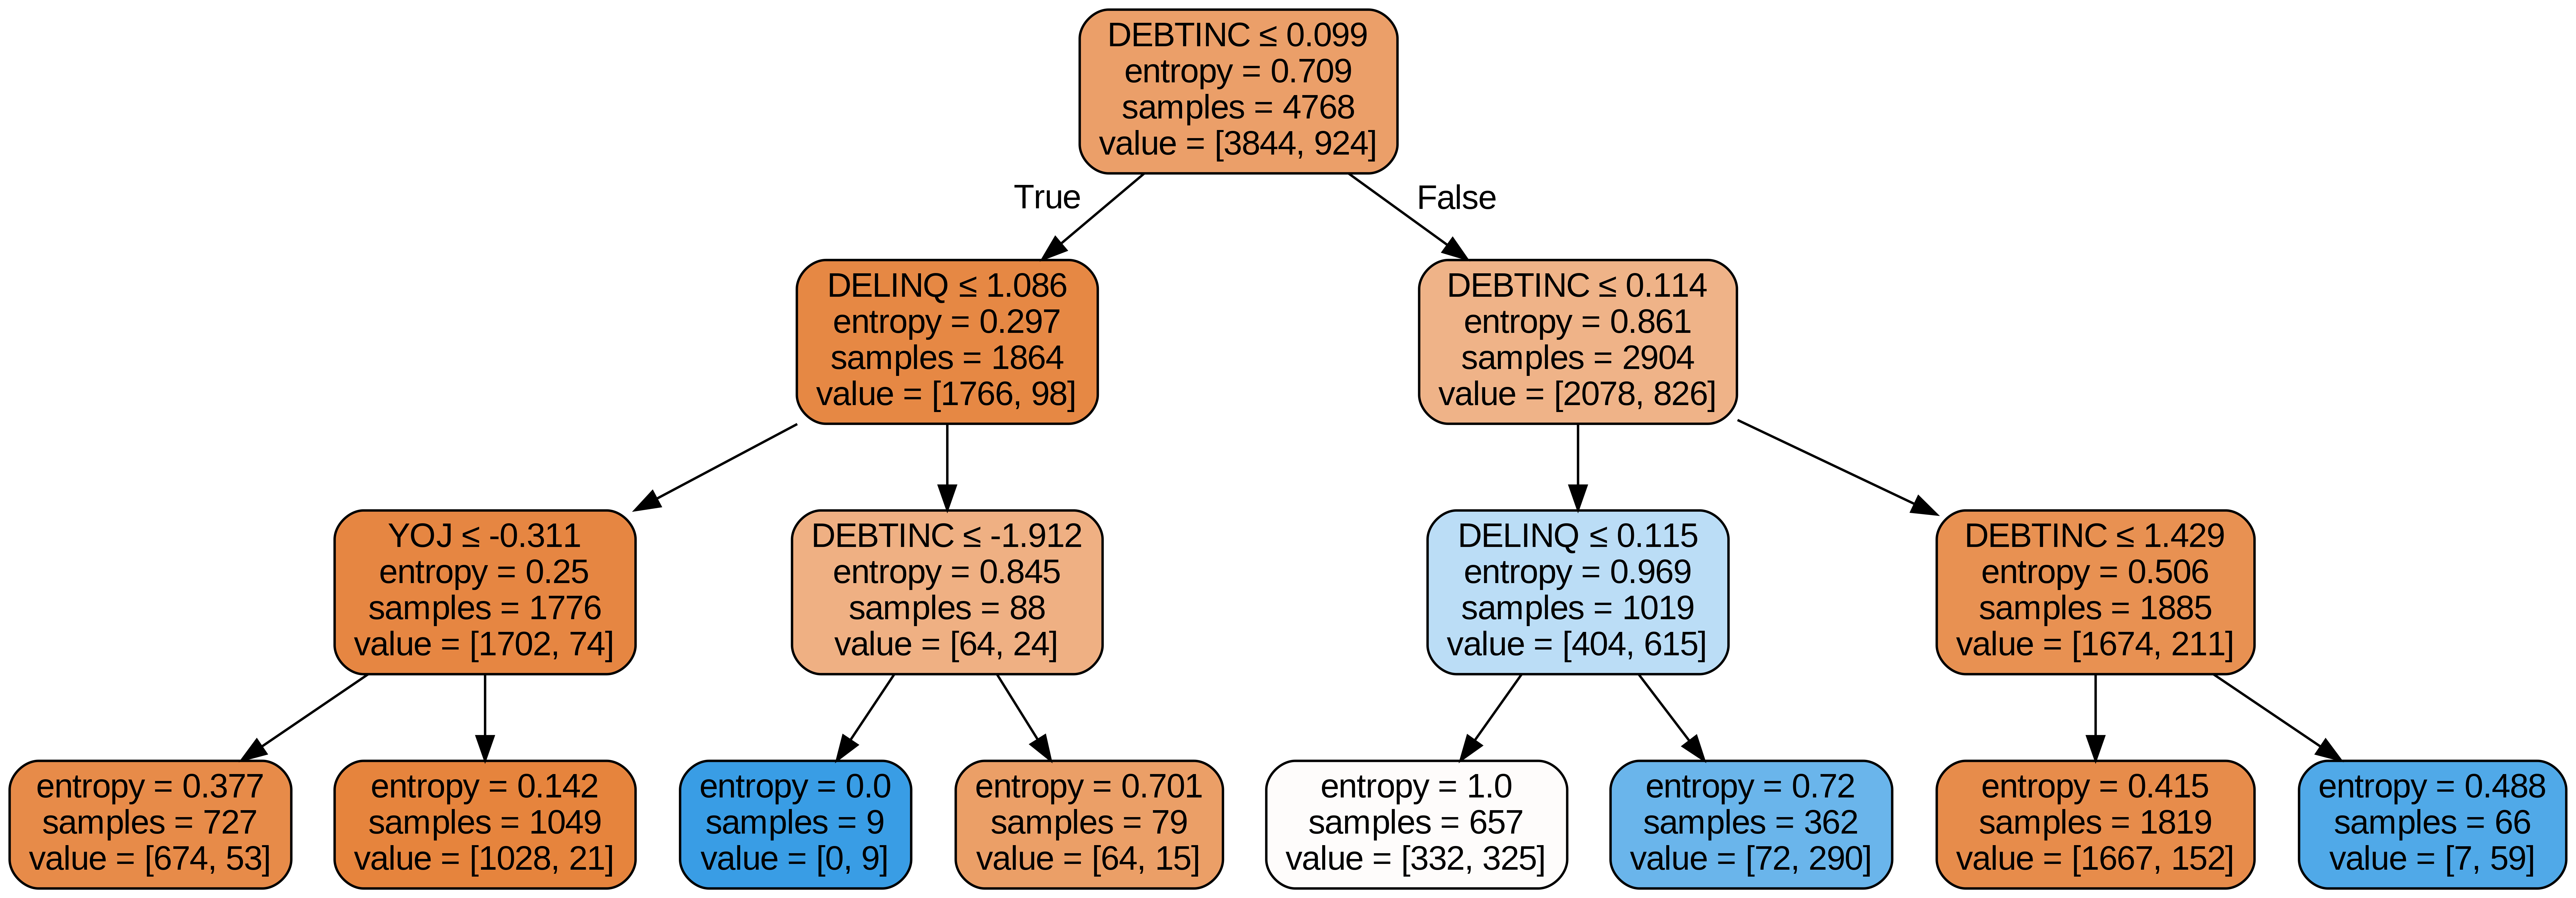

In [18]:
# Export the decision tree as a dot file with correct feature names
feature_names = numerical_features.tolist() + preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features).tolist()
export_graphviz(dt_model, out_file="tree_dt_model.dot",
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_names)

# Convert the dot file to a PNG image
os.system("dot -Tpng tree_dt_model.dot -o tree_dt_model.png -Gdpi=600")

# Display the PNG image
Image(filename='tree_dt_model.png')

# **Conclusion:**

This Decision Tree model is based on data pertaining to home equity loans, aiming to classify instances into categories of default and non-default.

# **Interpretation of the Decision Tree:**

In the context of my dataset the target variable "BAD" indicates whether a client defaulted on a loan (1) or repaid the loan (0). Interpreting the condition "DEBTINC < 0.09 in the root node" would mean the following:

The most critical factor in the classification process is the debt to income ratio (DEBTINC).

When the DEBTINC is less than or equal to 0.09 for a given sample, the model predicts that the sample is likely to be classified as non-default (orange node).

Conversely, when DEBTINC exceeds 0.09, the sample is more likely to be classified as default (blue node).

Subsequent Criteria:

The decision-making process continues recursively for each node in the tree, evaluating different features to classify samples into default and non-default categories.

Debt to Income Ratio (DEBTINC):
Interpreting the condition "DEBTINC < 0.09 in the root node" indicates:

DEBTINC < 0.09: This condition suggests that the Debt to Income Ratio (DEBTINC) being less than 0.09 is used as a criterion at the root node of the Decision Tree model.

Interpretation: Clients with a Debt to Income Ratio (DEBTINC) less than 0.09 are likely to be classified as having repaid the loan (non-default) based on this initial condition.



Second Node (bottom-left) with Orange Color (Dark Orange) and DEBTINC < 1.086:

This node represents a decision point in the tree where the Debt to Income Ratio (DEBTINC) is less than 1.086.

Since the color is orange, it indicates that the samples falling into this node are likely classified as non-default (loan repaid, BAD = 0).

Specifically, for samples reaching this node, having a Debt to Income Ratio (DEBTINC) less than 1.086 suggests a higher likelihood of loan repayment based on the model's classification.

*****************************************************************
In the context of a Decision Tree model, when we encounter a node with entropy equal to 0, it means that all the samples reaching that node belong to the same class. In my case, the entropy is 0, and the sample count is 9, with all samples having the class label 0.

Entropy = 0: Indicates perfect purity in the node. All samples reaching this node belong to the same class (in this case, class 0, which likely corresponds to non-default or loan repaid).

Sample Count = 9: There are a total of 9 samples that reach this node.

Values = [0, 9]: Indicates that out of the 9 samples reaching this node, all 9 samples belong to class 0 (non-default or loan repaid), and there are no samples of class 1 (default).

Color Blue at the End of DEBTINC < 0.09: Since the node is at the end of the decision path where the condition "DEBTINC < 0.09" is satisfied, and all samples reaching this node have the class label 0 (non-default), the blue color likely represents the default class. However, in this case, since there are no samples of the default class, it could signify that the node is "pruned" or not included in the final tree due to the perfect separation of samples at higher nodes.

The pale color of blue and orange means entropy, a measure of quantification of uncertainty in data. Note that a high entropy means high uncertainy about predicting the result of being default or not.

In summary, encountering a node with entropy equal to 0, all samples belonging to the same class (in this case, class 0), suggests perfect purity in the classification at that node. The blue color, typically associated with the default class, signifies the lack of samples of that class in this specific node.



# **Random Forest Model:**

In [21]:
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Random Forest Accuracy on Testing Data: 0.8942953020134228
Random Forest Accuracy on Training Data: 0.9928691275167785


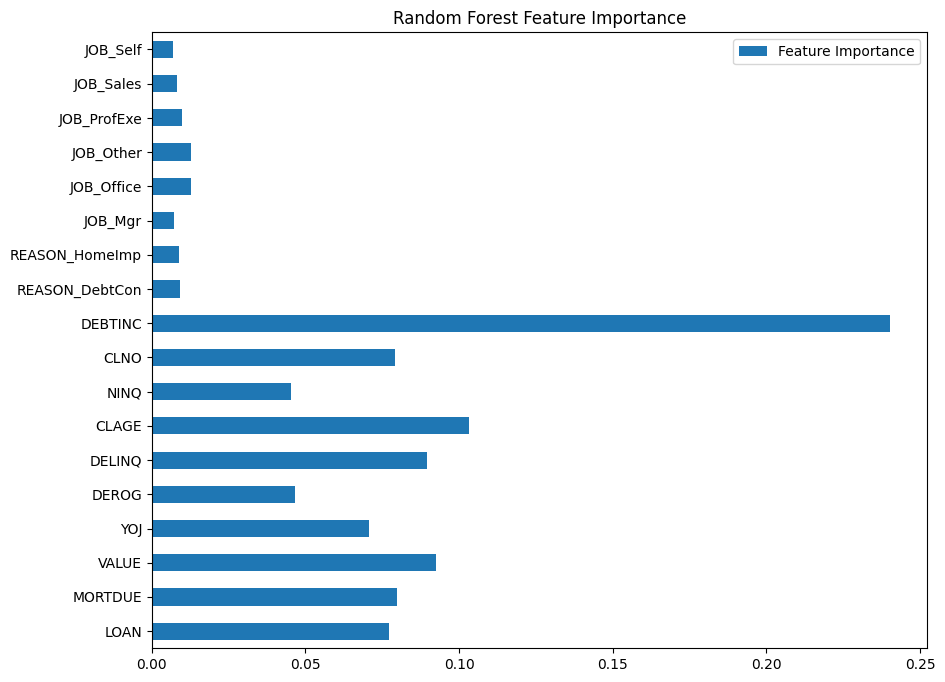

In [22]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=10, oob_score=True, criterion='entropy')

# Fit the model to the preprocessed training data
rf_model.fit(X_train_processed, y_train)

# Predict on the preprocessed testing data
predicted_labels_test = rf_model.predict(X_test_processed)

# Evaluate the model on testing data
accuracy_rf_test = accuracy_score(y_test, predicted_labels_test)
print("Random Forest Accuracy on Testing Data:", accuracy_rf_test)

# Predict on the preprocessed training data
predicted_labels_train = rf_model.predict(X_train_processed)

# Evaluate the model on training data
accuracy_rf_train = accuracy_score(y_train, predicted_labels_train)
print("Random Forest Accuracy on Training Data:", accuracy_rf_train)

# Visualize feature importance
numerical_feature_names = preprocessor.named_transformers_['num'].get_feature_names_out(numerical_features)
categorical_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
feature_names = numerical_feature_names.tolist() + categorical_feature_names.tolist()

feat_importance = rf_model.feature_importances_
pd.DataFrame({'Feature Importance': feat_importance},
             index=feature_names).plot(kind='barh', figsize=(10, 8))
plt.title('Random Forest Feature Importance')
plt.show()


# **Combined model: Random Forest, Decision Tree, and Naive Bayes**

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [35]:
# Define X and y
X = df.drop('BAD', axis=1)
y = df['BAD']

In [36]:
# Preprocessing pipeline
numerical_features = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
categorical_features = ['REASON', 'JOB']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [37]:
# Models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# Store classification metrics in a DataFrame
results = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [38]:
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    pipeline.fit(X_train, y_train)

    # Predictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # Store metrics in DataFrame
    results = results.append({
        'Model': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index=True)

# Display results
results


<ipython-input-38-cc98813e269b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-38-cc98813e269b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-38-cc98813e269b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,Decision Tree,1.000000,0.856544,0.689516,0.645283,0.666667
1,Random Forest,1.000000,0.909396,0.879227,0.686792,0.771186
2,Naive Bayes,0.802223,0.776007,0.495192,0.388679,0.435518


# **Choosing the best Model:**

Based on these metrics, the Random Forest model performs the best on the test data, having the highest test accuracy, precision, recall, and F1 score among the three models. Therefore, the Random Forest model is the recommended choice for this classification task.

# **Hyperparameter Tuning the best model using RandomizedSearchCV**

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV

# Define X and y
X = df.drop('BAD', axis=1)
y = df['BAD']

# Preprocessing pipeline
numerical_features = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
categorical_features = ['REASON', 'JOB']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Random Forest model
rf_model = RandomForestClassifier()

# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Random Forest
param_grid = {
    'model__n_estimators': [50, 100, 150, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__bootstrap': [True, False]
}

# Create a RandomizedSearchCV object for Random Forest
rf_random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, n_iter=100,
                                      scoring='accuracy', cv=5, verbose=2, random_state=42, n_jobs=-1)

# Perform the Randomized Search for Random Forest
rf_random_search.fit(X_train, y_train)

# Best parameters and best score for Random Forest
print("Best Parameters for Random Forest:", rf_random_search.best_params_)
print("Best Score for Random Forest:", rf_random_search.best_score_)

# Predictions
y_pred_best_rf = rf_random_search.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_best_rf)
print("Accuracy:", accuracy)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters for Random Forest: {'model__n_estimators': 50, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 30, 'model__bootstrap': False}
Best Score for Random Forest: 0.9215598540194158
Accuracy: 0.9219798657718121


After performing the hyperparameter tuning, the performance of the model i terms of accuracy has been increased to 92.19% from 90.09%.

# **Getting Confusion matrix on test dataset:**

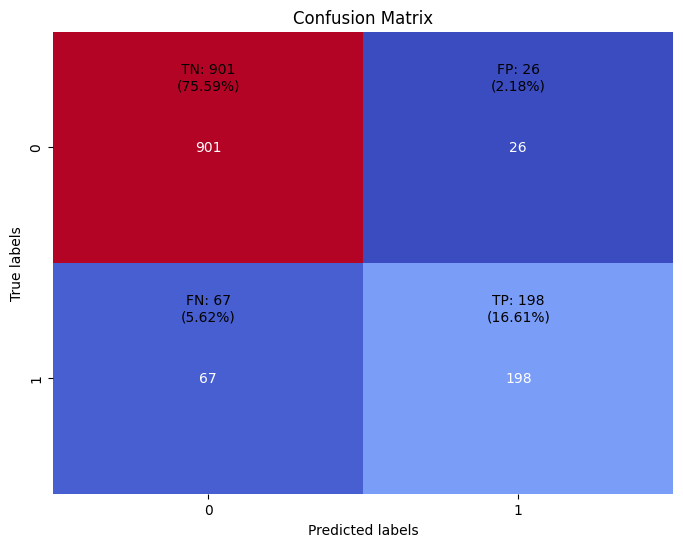

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best_rf)

# Calculate TP, TN, FP, FN
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate percentages
total = TP + TN + FP + FN
percentage_TP = (TP / total) * 100
percentage_TN = (TN / total) * 100
percentage_FP = (FP / total) * 100
percentage_FN = (FN / total) * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='coolwarm', cbar=False)

# Add percentages to the plot
plt.text(0.5, 0.2, f'TN: {TN}\n({percentage_TN:.2f}%)', ha='center', va='center', color='black')
plt.text(1.5, 0.2, f'FP: {FP}\n({percentage_FP:.2f}%)', ha='center', va='center', color='black')
plt.text(0.5, 1.2, f'FN: {FN}\n({percentage_FN:.2f}%)', ha='center', va='center', color='black')
plt.text(1.5, 1.2, f'TP: {TP}\n({percentage_TP:.2f}%)', ha='center', va='center', color='black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()

# **Visualizing the Feature Importance for the best model**

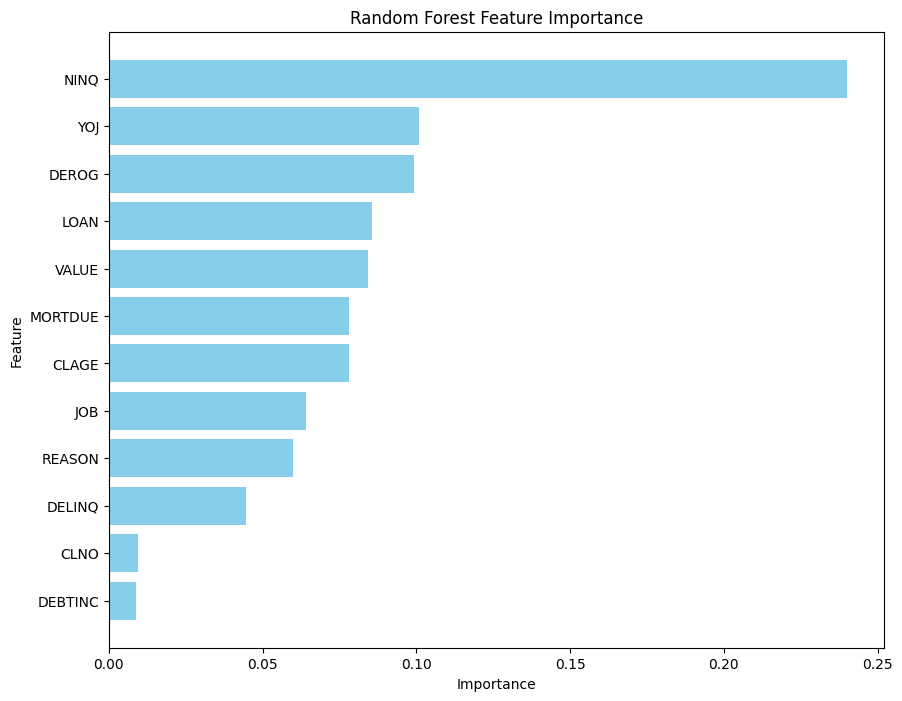

In [46]:
# Get the best estimator (model) from RandomizedSearchCV
best_rf_model = rf_random_search.best_estimator_.named_steps['model']

# Compute feature importances
feature_importances = best_rf_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Ensure feature names and importances have the same length
num_features = min(len(feature_names), len(feature_importances))
feature_names = feature_names[:num_features]
feature_importances = feature_importances[:num_features]

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()

In [47]:
print(len(feature_names))  # Check the length of feature_names
print(len(feature_importances))  # Check the length of feature_importances

12
12


# **ROC Curve:**

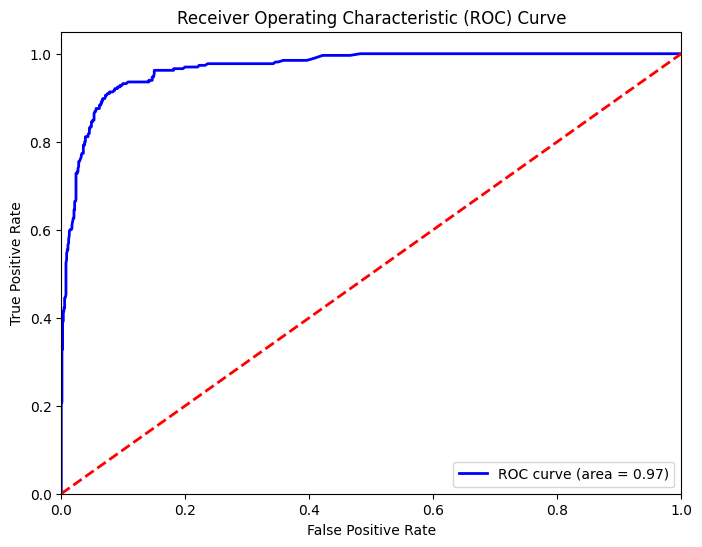

In [55]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Fit the preprocessor on the training data
preprocessor.fit(X_train)

# Reapply preprocessing steps to X_test
X_test_processed = preprocessor.transform(X_test)

# Make predictions on the testing set
y_pred_prob = best_rf_model.predict_proba(X_test_processed)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()